In [ ]:
import matplotlib.pylab as pylab
import numpy as np

params = {'legend.fontsize': 'large',
          'figure.figsize': (10, 8),
          'figure.titlesize': 'x-large',
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'medium',
          'ytick.labelsize':'medium',
          'lines.markersize': 10
          }
pylab.rcParams.update(params)

In [35]:
import matplotlib.pyplot as plt
from skimage.util import img_as_ubyte, img_as_bool, img_as_float
from skimage.exposure import histogram
from skimage import data
import skimage.color as color
import skimage.io as io

convert = {
    'grayscale' : color.rgb2gray,
    'binary' : img_as_bool,
    'ubyte' : img_as_ubyte,
    'float' : img_as_float
}

def plot_img_formats(image, formats):
    fig, ax = plt.subplots(ncols=len(formats), figsize=(10, 8))
    for i, format in enumerate(formats):
        img_format = convert[format](image)
        ax[i].imshow(img_format, cmap=plt.cm.gray)
        ax[i].axis('off')
    plt.savefig('images/formats_img.png')
    plt.show()

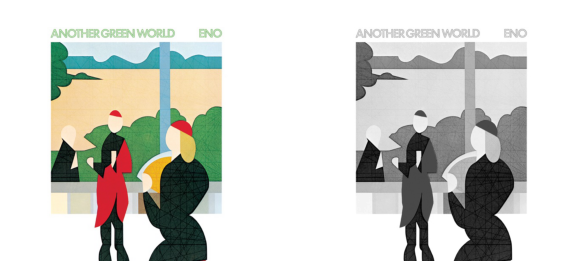

In [36]:
filepath = 'source_images/Another_Green_World.jpg'

image = io.imread(filepath)

plot_img_formats(image, ['float', 'grayscale'])

In [40]:
from skimage.util import random_noise

grayscale = color.rgb2gray(image)
gaussian = random_noise(grayscale, mode='gaussian', var=0.3)
sp = random_noise(grayscale, mode='s&p', amount=0.55)
spec = random_noise(grayscale, mode='speckle', mean=0.1, var=0.5)

io.imsave('images/gaussian.jpg', gaussian)
io.imsave('images/s&p.jpg', sp)
io.imsave('images/spec.jpg', spec)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


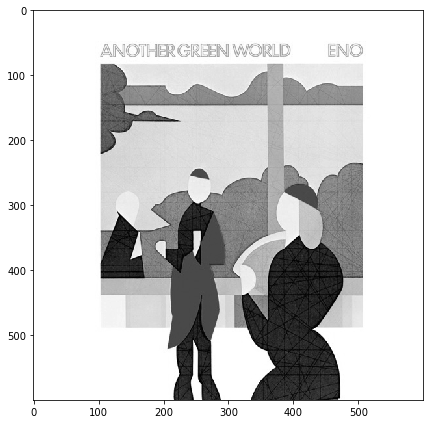

In [86]:
import skimage.color as color
filepath = 'source_images/Another_Green_World.jpg'

image = io.imread(filepath)
image = color.rgb2gray(image)
grayscale = img_as_ubyte(image)
io.imshow(grayscale)

io.show()
io.imsave('images/grayscale.jpg', grayscale)

In [76]:
import skimage.filters as filters

filepath = 'images/gaussian.jpg'

image = io.imread(filepath)

filtered_img_norm = filters.gaussian(image, sigma=1, mode='reflect', multichannel=True)
filtered_img_low = filters.gaussian(image, sigma=0.5, mode='reflect', multichannel=True)
filtered_img_high = filters.gaussian(image, sigma=2, mode='reflect', multichannel=True)

filtered_images = [filtered_img_low, filtered_img_norm, filtered_img_high]

filenames = ['low', 'medium', 'high']

for filt_im, name in zip(filtered_images, filenames):
    io.imsave(f'images/gaussian_filter/gaussian_filt_{name}.jpg', filt_im)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [71]:
import skimage. metrics as metrics

truepath = 'source_images/Another_Green_World.jpg'
image_true = io.imread(truepath)
image_true = img_as_ubyte(color.rgb2gray(image_true))

testpath = f'images/gaussian_filter/gaussian_filt_low.jpg'
image_test = io.imread(testpath)
image_test = img_as_ubyte(color.rgb2gray(image_test))

PSNR = metrics.peak_signal_noise_ratio(image_true, image_test)

print(f'PSNR для гаусовської фільтрації при σ=0.5 : PSNR = {PSNR}')

PSNR для гаусовської фільтрації при σ=0.5 : PSNR = 10.103333738166855


C:\Users\Vonej\AppData\Local\Temp/ipykernel_14920/2457863618.py:9: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  image_test = img_as_ubyte(color.rgb2gray(image_test))


In [73]:
testpath = f'images/gaussian_filter/gaussian_filt_medium.jpg'
image_test = io.imread(testpath)
image_test = img_as_ubyte(color.rgb2gray(image_test))

PSNR = metrics.peak_signal_noise_ratio(image_true, image_test)

print(f'PSNR для гаусовської фільтрації при σ=1 : PSNR = {PSNR}')

PSNR для гаусовської фільтрації при σ=1 : PSNR = 12.196768643347301


C:\Users\Vonej\AppData\Local\Temp/ipykernel_14920/80087344.py:3: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  image_test = img_as_ubyte(color.rgb2gray(image_test))


In [74]:
testpath = f'images/gaussian_filter/gaussian_filt_high.jpg'
image_test = io.imread(testpath)
image_test = img_as_ubyte(color.rgb2gray(image_test))

PSNR = metrics.peak_signal_noise_ratio(image_true, image_test)

print(f'PSNR для гаусовської фільтрації при σ=2 : PSNR = {PSNR}')

PSNR для гаусовської фільтрації при σ=2 : PSNR = 13.284158585952628


C:\Users\Vonej\AppData\Local\Temp/ipykernel_14920/2971693580.py:3: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  image_test = img_as_ubyte(color.rgb2gray(image_test))


In [83]:
import skimage.filters as filters
from skimage.morphology import disk

filepath = 'images/spec.jpg'

image = io.imread(filepath)
image = img_as_ubyte(image)

filtered_img_three = filters.median(image, disk(3))
filtered_img_five = filters.median(image, disk(5))
filtered_img_seven = filters.median(image, disk(7))

filtered_images = [filtered_img_three, filtered_img_five, filtered_img_seven]

filenames = ['disk(3)', 'disk(5)', 'disk(7)']

for filt_im, name in zip(filtered_images, filenames):
    io.imsave(f'images/median_filter/median_filt_{name}.jpg', filt_im)

In [87]:
import skimage. metrics as metrics

truepath = 'source_images/Another_Green_World.jpg'
image_true = io.imread(truepath)
image_true = img_as_ubyte(color.rgb2gray(image_true))

testpath = f'images/median_filter/median_filt_disk(3).jpg'
image_test = io.imread(testpath)
image_test = img_as_ubyte(color.rgb2gray(image_test))

MSE= metrics.mean_squared_error(image_true, image_test)

print(f'MSE для медіанної фільтрації при disk(3) : MSE = {MSE}')



MSE для медіанної фільтрації при disk(3) : MSE = 528.0943027777778


C:\Users\Vonej\AppData\Local\Temp/ipykernel_14920/2783139084.py:9: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  image_test = img_as_ubyte(color.rgb2gray(image_test))


In [88]:
testpath = f'images/median_filter/median_filt_disk(5).jpg'
image_test = io.imread(testpath)
image_test = img_as_ubyte(color.rgb2gray(image_test))

MSE= metrics.mean_squared_error(image_true, image_test)

print(f'MSE для медіанної фільтрації при disk(5) : MSE = {MSE}')

MSE для медіанної фільтрації при disk(5) : MSE = 405.07544722222224


C:\Users\Vonej\AppData\Local\Temp/ipykernel_14920/98508953.py:3: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  image_test = img_as_ubyte(color.rgb2gray(image_test))


In [89]:
testpath = f'images/median_filter/median_filt_disk(7).jpg'
image_test = io.imread(testpath)
image_test = img_as_ubyte(color.rgb2gray(image_test))

MSE= metrics.mean_squared_error(image_true, image_test)

print(f'MSE для медіанної фільтрації при disk(7) : MSE = {MSE}')

MSE для медіанної фільтрації при disk(7) : MSE = 444.819525


C:\Users\Vonej\AppData\Local\Temp/ipykernel_14920/3919549945.py:3: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  image_test = img_as_ubyte(color.rgb2gray(image_test))


In [ ]:
import skimage.filters as filters
from skimage.morphology import disk

filepath = 'images/spec.jpg'

image = io.imread(filepath)
image = img_as_ubyte(image)

filtered_img_three = filters.median(image, disk(3))
filtered_img_five = filters.median(image, disk(5))
filtered_img_seven = filters.median(image, disk(7))

filtered_images = [filtered_img_three, filtered_img_five, filtered_img_seven]

filenames = ['disk(3)', 'disk(5)', 'disk(7)']

for filt_im, name in zip(filtered_images, filenames):
    fig, ax = plt.subplots(ncols=2, figsize=(10, 8))
    ax[0].imshow(image, cmap=plt.cm.gray)
    ax[0].axis('off')
    ax[1].imshow(filt_im, cmap=plt.cm.gray)
    ax[1].axis('off')
    plt.savefig(f'images/median_filter/comparison/median_filt_{name}.jpg')

io.imshow(filtered_img_three)

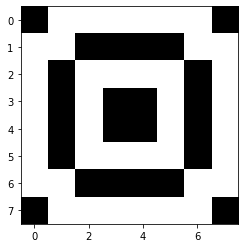

In [68]:
import cv2
from skimage.util import img_as_ubyte, img_as_bool, img_as_float
from skimage.exposure import histogram
from skimage import data
import skimage.color as color
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import gaussian

filepath = 'source_images/Another_Green_World.jpg'

image = io.imread(filepath)
grayscale = img_as_bool(image)
grayscale = np.array([[0,1,1,1,1,1,1,0],
                      [1,1,0,0,0,0,1,1],
                      [1,0,1,1,1,1,0,1],
                      [1,0,1,0,0,1,0,1],
                      [1,0,1,0,0,1,0,1],
                      [1,0,1,1,1,1,0,1],
                      [1,1,0,0,0,0,1,1],
                      [0,1,1,1,1,1,1,0]])/1

filtered = cv2.GaussianBlur(grayscale,(3,3), 0.85)
plt.imshow(-grayscale, cmap='binary')

[[0.68743095 0.56270725 0.50027641 0.50027641 0.56270725 0.68743095]
 [0.56270725 0.56229271 0.56229271 0.56229271 0.56229271 0.56270725]
 [0.50027641 0.56229271 0.43770729 0.43770729 0.56229271 0.50027641]
 [0.50027641 0.56229271 0.43770729 0.43770729 0.56229271 0.50027641]
 [0.56270725 0.56229271 0.56229271 0.56229271 0.56229271 0.56270725]
 [0.68743095 0.56270725 0.50027641 0.50027641 0.56270725 0.68743095]]


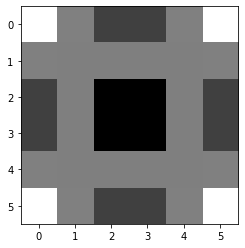

In [70]:
plt.imshow(-filtered[1:7,1:7], cmap='binary')
print(filtered[1:7,1:7])

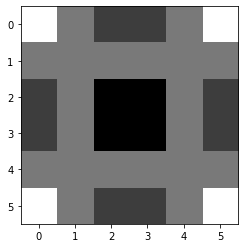

In [71]:
handwritten = np.array([[0.69,0.56,0.5,0.5,0.56,0.69],
                      [0.56,0.56,0.56,0.56,0.56,0.56],
                      [0.5,0.56,0.44,0.44,0.56,0.5],
                      [0.5,0.56,0.44,0.44,0.56,0.5],
                      [0.56,0.56,0.56,0.56,0.56,0.56],
                      [0.69,0.56,0.5,0.5,0.56,0.69]])
plt.imshow(-handwritten, cmap='binary')

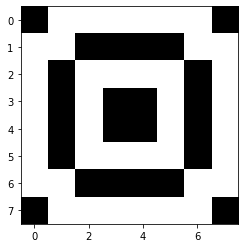

In [65]:
from scipy.ndimage import filters
plt.imshow(-filters.gaussian_filter(grayscale, 0.75), cmap='binary')

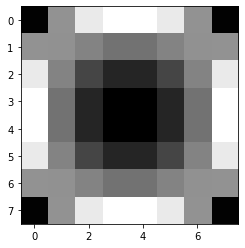

In [18]:
plt.imshow(-gaussian(grayscale, sigma=1.3), cmap='binary')

In [96]:
mtrx =      np.array([[0,0,0,0,0,0,0,0,0,0],
                      [0,0,0,0,1,0,1,0,0,0],
                      [0,0,0,0,1,1,1,0,0,0],
                      [0,0,0,0,1,0,1,0,0,0],
                      [0,0,0,0,0,1,0,0,0,0],
                      [0,0,0,0,0,1,1,1,0,0],
                      [0,1,0,1,0,0,1,0,0,0],
                      [0,1,1,1,0,0,0,0,0,0],
                      [0,1,0,1,0,0,0,0,0,0],
                      [0,0,0,0,0,0,0,0,0,0]])

filter_mask = np.array([[1,0,1],
                        [1,1,1],
                        [1,0,1]])

mtrx[0:3, 5:8]

array([[0, 0, 0],
       [0, 1, 0],
       [1, 1, 0]])

In [97]:
n, m = len(mtrx), len(filter_mask)
filtered = np.zeros((n-m+1,n-m+1))
for i in range(n-m+1):
    for j in range(n-m+1):
        filtered[j][i] = np.sum(np.multiply(mtrx[j:j+3, i:i+3], filter_mask))
filtered

array([[0., 0., 2., 2., 4., 2., 2., 0.],
       [0., 0., 3., 2., 7., 2., 3., 0.],
       [0., 0., 2., 3., 4., 3., 2., 0.],
       [0., 0., 1., 2., 4., 3., 2., 1.],
       [0., 2., 0., 3., 3., 4., 3., 1.],
       [2., 4., 2., 3., 2., 3., 2., 1.],
       [2., 7., 2., 3., 1., 0., 1., 0.],
       [2., 4., 2., 2., 0., 0., 0., 0.]])